
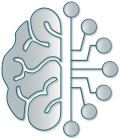

**Environment initialized:** Tuesday 03 February 2026, 16:51:18 on insa-12842

In [1]:
# This now triggers vID.init() automatically via __init__.py
import pyphyschemtools as t4pPC
from pyphyschemtools import fg, hl, bg, color
t4pPC.init('t4pPC')
%matplotlib inline

# tools for pyPhysChem

## `Chem3D.py`

### `molView` class

#### Basic use

In [2]:
from pyphyschemtools import molView

t4pPC.centerTitle("Read coordinates from PubChem")
molView(338, source="cid")
t4pPC.centerTitle("Read coordinates from the Protein Data Bank")
molView("1HTB", source="rscb", style='cartoon', w=1000, h=600)
t4pPC.centerTitle("Read coordinates from the Crystallography Open Database")
mv = molView(1000058,'cod',w=600,h=600,supercell=(2,2,2))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

/home/romuald/Python3/base/lib/python3.11/site-packages/ase/io/cif.py:410: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(136, setting=1). This may result in wrong setting!
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Advanced use



In [3]:
t4pPC.centerTitle("Read coordinates frbbom pubChem and show them in a grid")
import pubchempy as pcp
CIDs = [95417, 98039, 95336]
compounds = ["DBA","DBA5","DBA6"]

titles = []
for i, cid in enumerate(CIDs):
    t4pPC.centertxt(compounds[i])
    c = pcp.Compound.from_cid(cid)
    print("molecular formula = ",c.molecular_formula)
    print("IUPAC name = ",c.iupac_name)
    titles.append(f"{compounds[i]} ({cid})\n{c.iupac_name}")

molView.view_grid(CIDs, n_cols=3, source='cid', style='bs', titles=titles, w=400, detect_BondOrders=True)

molecular formula =  C17H14O
IUPAC name =  1,5-diphenylpenta-1,4-dien-3-one


molecular formula =  C19H16O
IUPAC name =  2,5-dibenzylidenecyclopentan-1-one


molecular formula =  C20H18O
IUPAC name =  2,6-dibenzylidenecyclohexan-1-one


GridspecLayout(children=(VBox(children=(Label(value='DBA (95417)\n1,5-diphenylpenta-1,4-dien-3-one', layout=La…

In [4]:
t4pPC.centerTitle("Calculate and display circumradius of a molecule")
m = molView(338, source="cid", display_now=False)
m.show_bounding_sphere()

Bounding Sphere: Radius = 5.01 Å | Volume = 527.76 Å³


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
t4pPC.centerTitle("Calculate and display a cavity, using the CageCavityCalc library")
m = molView("data_examples/Molecules/betaCD-closed.xyz", display_now=False)
m.show_cage_cavity(grid_spacing=0.4, color='cyan', opacity=0.8)
m.show_bounding_sphere()

Cavity Volume (CageCavityCalc): 168.75 Å³
Dimensions: 7.09 x 7.07 x 5.22 Å
Aspect Ratio (L/W): 1.00


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Bounding Sphere: Radius = 8.35 Å | Volume = 2436.99 Å³


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## `cheminformatics.py`

### `easy_rdkit` class

#### Basic use

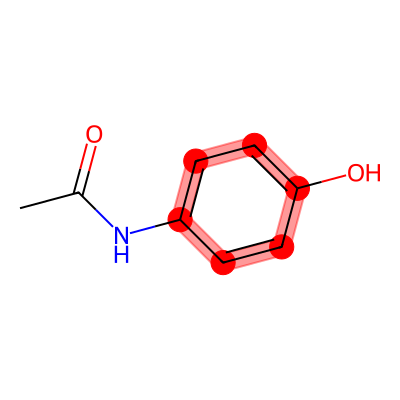

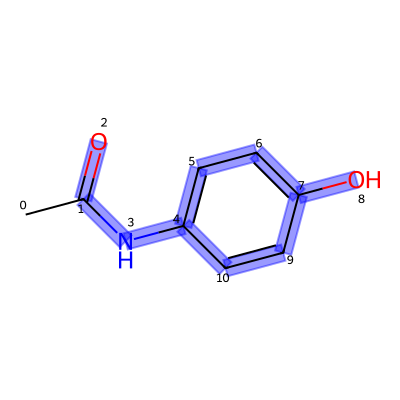

,index atome,symbole,e- valence,e- liants,charge formelle,doublets non-liants (DNL),lacunes ([]),nombre de liaisons,e- total (octet ?),O/H/D ?
0,0,C,4,4,0,0,0,4,8,✅ octet
1,1,C,4,4,0,0,0,4,8,✅ octet
2,2,O,6,2,0,2,0,2,8,✅ octet
3,3,N,5,3,0,1,0,3,8,✅ octet
4,4,C,4,4,0,0,0,4,8,✅ octet
5,5,C,4,4,0,0,0,4,8,✅ octet
6,6,C,4,4,0,0,0,4,8,✅ octet
7,7,C,4,4,0,0,0,4,8,✅ octet
8,8,O,6,2,0,2,0,2,8,✅ octet
9,9,C,4,4,0,0,0,4,8,✅ octet


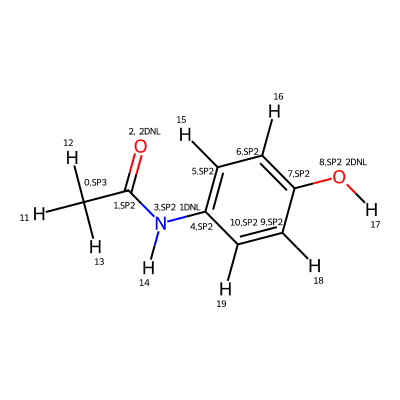

In [18]:
from pyphyschemtools import easy_rdkit

mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O")

t4pPC.centerTitle("Aromatic part")
mol.show_mol(plot_aromatic=True)

t4pPC.centerTitle("Conjugated part")
mol.show_mol(plot_conjugation=True, show_n=True)

t4pPC.centerTitle("Lewis & hybridization")
mol.show_mol(show_Lewis=True, show_n=True, show_hybrid=True)


#### Advanced use

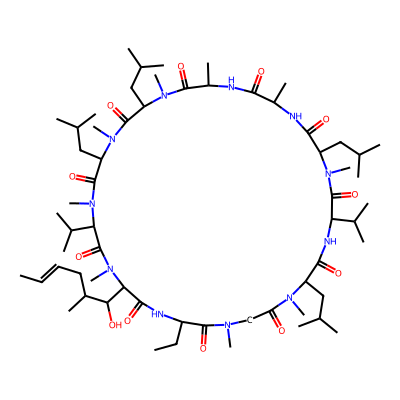

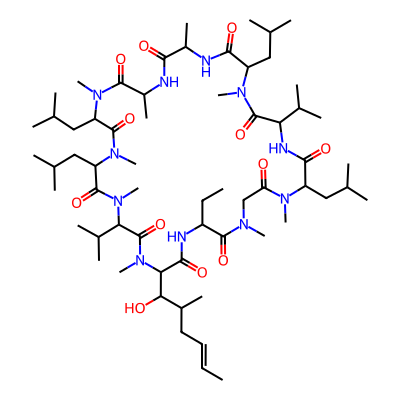

In [19]:
t4pPC.centerTitle("Better representation of macrocycles")
t4pPC.centertxt("without the 'macrocycle' option")
mol = easy_rdkit("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol.show_mol()
t4pPC.centertxt("with the 'macrocycle' option")
mol.show_mol(macrocycle=True)

## `kinetics.py`

### `KORD` class, aka Kinetic Order of Reaction Determination

Experiments detected: 9
✅ Loaded: exp9 (A550) (Exp 9)
   [Parameters from exp9 (A550)] A0: 1.1107e-04 mol.L-1 | alpha: 1.0 | beta: 1.0



,t / mn,exp9 (A550)
3,0,0.882985
4,0.5,0.618623
5,1,0.438617
6,1.5,0.306482
7,2,0.217056
8,2.5,0.153912
9,3,0.108867
10,3.5,0.077391
11,4,0.051715
12,4.5,0.036707


--- DEBUG INITIAL GUESS (Order 0) ---
  GUESS: k: 1.00e-02 | G0: 0.8830 | Ginf: 0.0077
  OPTIM: k: -1.24e-04 | G0: 0.5245 | Ginf: 0.6053
  ✅ RMSD: 1.36e-01
--- DEBUG INITIAL GUESS (Order 1) ---
  GUESS: k: 1.00e-02 | G0: 0.8830 | Ginf: 0.0077
  OPTIM: k: 7.03e-01 | G0: 0.8821 | Ginf: 0.0006
  ✅ RMSD: 2.16e-03
--- DEBUG INITIAL GUESS (Order 2) ---
  GUESS: k: 1.00e-02 | G0: 0.8830 | Ginf: 0.0077
  OPTIM: k: 7.52e+03 | G0: 0.9008 | Ginf: -0.1734
  ✅ RMSD: 2.06e-02


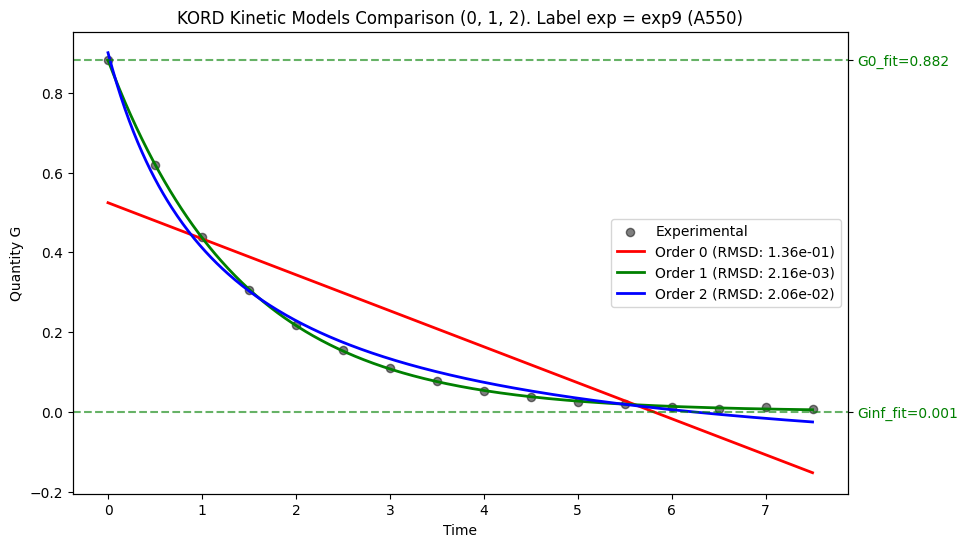

--- KORD CONCLUSION ---
Best model: ORDER 1
Initial concentration: 1.111e-04 mol.L-1
alpha: 1.0
beta: 1.0

RMSD: 2.16e-03
k: 7.030e-01
t1/2: 0.986

G0_exp: 8.830e-01
G0_fit: 8.821e-01
Ginf_fit: 5.682e-04
------------------------


In [1]:
from pyphyschemtools import KORD

t, G, headers, parameters = KORD.load_from_excel('./data_examples/Kinetics/Example4Kord.xlsx', exp_number=9)
study = KORD(t, G, headers, A0=parameters[0], alpha=parameters[1], beta=parameters[2], verbose=True)
study.plot_all_fits()
study.get_best_order()

In [6]:
t4pPC.end()

**End at:** Monday 02 February 2026, 22:43:35  
**Duration:** 00:00:20 010ms

# End